In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
from imageio import imread
import numpy as np
import os
import pandas as pd
from scripts.CNN.train_interactions import COLUMNS, match_pred_to_gt, model
import pandas as pd
from scripts.CNN.interactions_results import toarray, tostruct
from os.path import join

Using TensorFlow backend.


In [2]:
DATA_DIR = '/home/matej/prace/ferda/data/interactions/1712_36k_random'

pd.set_option('precision', 2)

In [11]:
y_test = pd.read_csv(join(DATA_DIR, 'test.csv'))
y_train = pd.read_csv(join(DATA_DIR, 'train.csv'))

# Training Data

In [12]:
y_train.describe()

,0_x,0_y,0_major,0_minor,0_angle_deg,1_x,1_y,1_major,1_minor,1_angle_deg,0_id,1_id,theta_rad,phi_rad,overlap_px,augmentation_angle_deg
count,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,3.60e+04,3.60e+04,36000.00,36000.00
mean,99.90,99.96,66.41,18.29,187.41,100.06,100.01,66.43,18.31,180.83,33155.46,33141.73,-4.24e-03,9.67e-04,4.95,179.73
std,14.43,14.44,9.51,2.89,104.25,10.68,10.68,9.47,2.95,103.60,5905.15,5922.09,1.81e+00,7.34e-01,5.01,103.62
min,53.60,56.60,24.20,10.30,0.00,58.00,60.90,24.20,10.30,0.00,22818.00,22818.00,-3.10e+00,-1.40e+00,0.00,0.00
25%,88.30,88.40,63.20,16.70,96.90,91.90,91.80,63.30,16.70,91.80,27936.50,27909.75,-1.60e+00,-5.00e-01,1.00,90.00
50%,99.90,100.00,68.60,18.20,193.90,100.10,100.00,68.60,18.20,181.20,32653.00,32611.00,0.00e+00,0.00e+00,3.00,180.00
75%,111.50,111.50,73.20,19.70,278.10,108.20,108.10,73.20,19.70,270.20,38978.00,38971.00,1.60e+00,5.00e-01,7.00,269.00
max,144.70,145.00,80.00,44.90,360.00,137.70,139.90,80.00,44.90,360.00,43334.00,43334.00,3.10e+00,1.40e+00,70.00,358.00


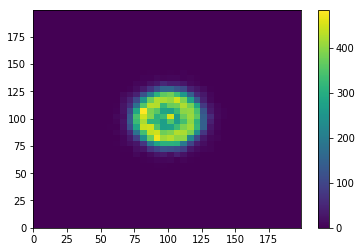

In [13]:
_ = plt.hist2d(y_train['0_x'], y_train['0_y'], bins=40, range=((0, 199), (0, 199)))
plt.colorbar()

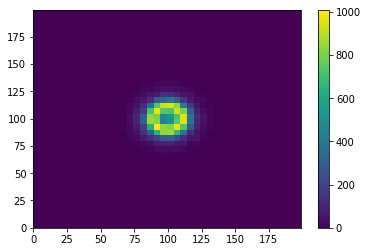

In [14]:
_ = plt.hist2d(y_train['1_x'], y_train['1_y'], bins=40, range=((0, 199), (0, 199)))
plt.colorbar()

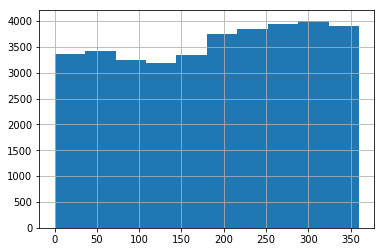

In [15]:
y_train['0_angle_deg'].hist()

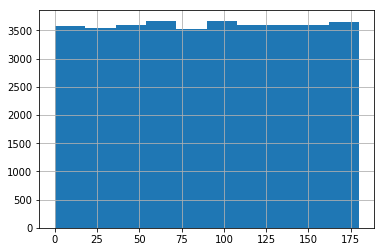

In [16]:
(y_train['0_angle_deg'] % 180).hist()

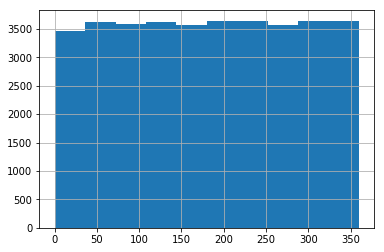

In [17]:
y_train['1_angle_deg'].hist()

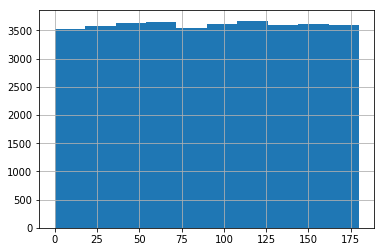

In [18]:
(y_train['1_angle_deg'] % 180).hist()

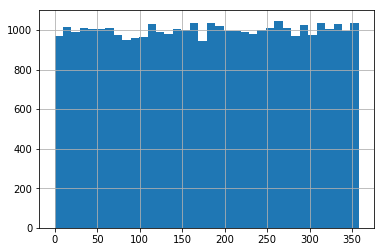

In [19]:
y_train['augmentation_angle_deg'].hist(bins=36)

# Test Data

In [20]:
y_test.describe()

,0_x,0_y,0_major,0_minor,0_angle_deg,1_x,1_y,1_major,1_minor,1_angle_deg,0_id,1_id,theta_rad,phi_rad,overlap_px,augmentation_angle_deg
count,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00
mean,99.99,99.83,66.39,18.48,189.78,99.98,100.26,66.33,18.34,183.29,33240.21,33070.23,-0.03,0.01,4.96,178.00
std,14.30,14.27,9.60,2.89,104.13,10.75,10.56,9.56,2.98,103.50,5909.19,5884.56,1.79,0.73,4.97,101.87
min,59.30,56.40,25.20,10.60,0.00,63.60,62.20,25.20,10.50,0.00,22821.00,22825.00,-3.10,-1.40,0.00,0.00
25%,88.50,88.50,63.30,16.90,99.80,91.60,92.00,63.20,16.70,95.25,28180.00,27887.50,-1.60,-0.50,1.00,91.00
50%,99.90,99.90,68.80,18.40,196.50,100.10,100.10,68.50,18.20,186.05,32671.50,32539.00,-0.00,0.00,3.00,178.00
75%,110.90,111.00,73.10,19.90,282.12,108.10,108.50,73.20,19.70,274.50,39107.00,38896.75,1.50,0.50,7.00,265.00
max,139.80,140.80,79.30,44.90,360.00,140.70,138.60,80.00,44.90,359.90,43334.00,43330.00,3.10,1.40,45.00,358.00


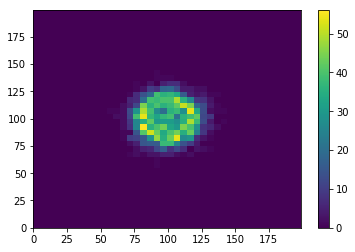

In [21]:
_ = plt.hist2d(y_test['0_x'], y_test['0_y'], bins=40, range=((0, 199), (0, 199)))
plt.colorbar()

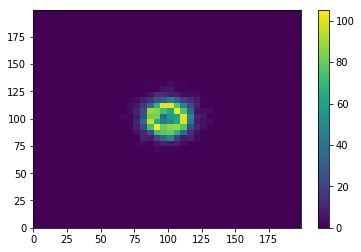

In [22]:
_ = plt.hist2d(y_test['1_x'], y_test['1_y'], bins=40, range=((0, 199), (0, 199)))
plt.colorbar()

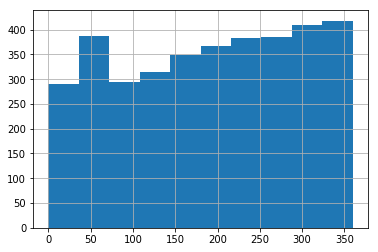

In [23]:
y_test['0_angle_deg'].hist()

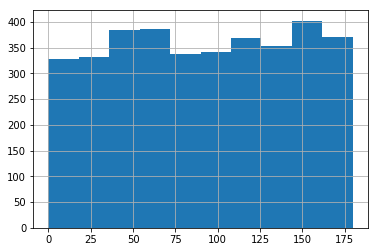

In [24]:
(y_test['0_angle_deg'] % 180).hist()

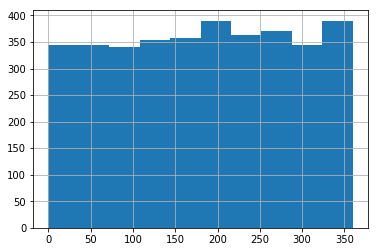

In [25]:
y_test['1_angle_deg'].hist()

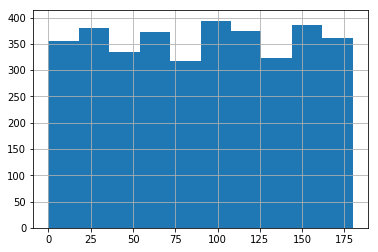

In [26]:
(y_test['1_angle_deg'] % 180).hist()

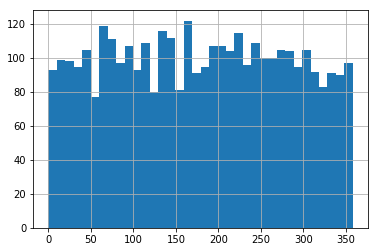

In [27]:
y_test['augmentation_angle_deg'].hist(bins=36)